In [14]:
import copy
import numpy as np
from sklearn import preprocessing
import h5py
import sklearn.svm
import random
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mt

In [15]:
class Layer:
    # constructor
    def __init__(self, neurons=0, theta=[], b=[], z=[], a=[],delta=[],DELTA_THETA=[],DELTA_BIAS=[],dTheta=[],dBias=[]):
        self.neurons = 0 # neurons count in layer
        self.theta = [] # Weight vector(W)
        self.b=[] # bias
        self.z = [] # hypothesis z = W.T * X + b = here = theta.T * X + b
        self.a = [] # activation function a=sigmoid(z) or relu(z) or anyother(z)
        self.delta = [] # Loss or Error function delta= delta_cross_entropy() or anyother()
        self.DELTA_THETA = [] # only derivative weight vector =dw
        self.DELTA_BIAS = [] # only derivative bias vector =db
        self.dTheta = [] # complete derivation term = (1/m)*(DELTA + (lambda*theta))
        self.dBias = [] # complete derivation term 

    def setNeurons(self, neurons):
        self.neurons = neurons

    def getNeurons(self):
        return self.neurons

    def setTheta(self, theta):
        self.theta = theta

    def getTheta(self):
        return self.theta

    def setB(self, b):
        self.b = b

    def getB(self):
        return self.b

    def setZ(self, z):
        self.z = z

    def getZ(self):
        return self.z

    def setA(self, a):
        self.a = a

    def getA(self):
        return self.a

    def setDelta(self, delta):
        self.delta = delta

    def getDelta(self):
        return self.delta

    def setDELTA_THETA(self, DELTA_THETA):
        self.DELTA_THETA = DELTA_THETA

    def getDELTA_THETA(self):
        return self.DELTA_THETA

    def setDELTA_BIAS(self, DELTA_BIAS):
        self.DELTA_BIAS = DELTA_BIAS

    def getDELTA_BIAS(self):
        return self.DELTA_BIAS
    
    def setDTheta(self, dTheta):
        self.dTheta = dTheta

    def getDTheta(self):
        return self.dTheta
    
    def setDBias(self, dBias):
        self.dBias = dBias

    def getDBias(self):
        return self.dBias
    
    

In [16]:
dataset = h5py.File('../MNIST_Subset-4.h5', 'r+')

print(list(dataset.keys()))

['X', 'Y']


In [17]:
data_X = dataset['X']
data_Y = dataset['Y']

X = np.array(data_X.value)
Y = np.array(data_Y.value)

print(X.shape,Y.shape)

# Y=Y.reshape(14251,1)
print(X.shape,Y.shape)

print(X.shape)
X=X.reshape(14251,28*28)
print(X.shape)

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=20)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

X=X_train #X= X_train
Y=Y_train #Y=Y_train

X = preprocessing.scale(X)
X_test=preprocessing.scale(X_test)

m=X.shape[0]
print('no.of samples:',m)

X=X.T # transposed X now shape=784 x 14251 => now each column is one datapoint
X_test=X_test.T
print(X.shape)

(14251, 28, 28) (14251,)
(14251, 28, 28) (14251,)
(14251, 28, 28)
(14251, 784)
(11400, 784) (2851, 784) (11400,) (2851,)
no.of samples: 11400
(784, 11400)


In [18]:
def sigmoid(z):
    return (1.0/(1.0+np.exp(-z)))

In [19]:
def softmax(z):
    return np.divide(np.exp(z),np.sum(np.exp(z),axis=0))

In [20]:
def stableSoftmax(z):
    exps = np.exp(z - np.max(z))
    return np.divide(exps , np.sum(exps,axis=0))

In [21]:
def delta_cross_entropy(z,y):
    grad = (z-y)/m
    return grad

In [22]:
def crossEntropy(a,y):
    return (-y*np.log(a))/m

In [23]:
def accuracy(y_predicted):
    y_multilabel = []
    for p in y_predicted:
        y_multilabel.append(list(p).index(max(p)))
    
    plot_accuracy.append(accuracy_score(y_multilabel, Y))
    print(accuracy_score(y_multilabel, Y))
    
def accuracy_test(y_predicted):
    y_multilabel = []
    for p in y_predicted:
        y_multilabel.append(list(p).index(max(p)))
        
    print(accuracy_score(y_multilabel, Y_test))

In [24]:
y_actual=[] # changed to 1 at their index

for i in range(Y.shape[0]):
    temp = [0]*10
    index = int(Y[i])
    temp[index] = 1
    y_actual.append(temp)
y_actual=np.array(y_actual).T


In [40]:
# l=int(input('enter total layers:'))
# layers=[]
# for i in range(l):
#     layers.append(int(input('enter neurons count:')))
# print(layers)

l=5
neurons=[784,100,50,50,10]

# l=3
# neurons=[784,100,10]

layers=[]
for i in range(len(neurons)):
    lay=Layer()
    
    if(i!=len(neurons)-1):
        DELTA_THETA=np.zeros((neurons[i+1],neurons[i]))
        theta=np.random.uniform(low=0.1,high=1,size=(neurons[i],neurons[i+1]))
        #DELTA_BIAS=
        #bias=
        
        lay.setDELTA_THETA(DELTA_THETA)
        lay.setTheta(theta)
        
    layers.append(lay)

plot_accuracy=[]

layers[0].setA(X)
regParam=0.0001
alpha=1
maxIterations=1000

for iter in range(maxIterations):
    
    # Forward propagation
    for i in range(1,l):
        z=np.dot(layers[i-1].getTheta().T, layers[i-1].getA())
        if(i==l-1):
            a=softmax(z)
        else:
            a=sigmoid(z)
        layers[i].setZ(z)
        layers[i].setA(a)
    
    # Backward Propagation
    for i in range(l-1,-1,-1):
        loss=None
        if(i==l-1):
            loss=delta_cross_entropy(layers[i].getA(),y_actual)
        else:
            loss=np.dot(layers[i].getTheta(),layers[i+1].getDelta()) * (layers[i].getA()*(1-layers[i].getA()))
        layers[i].setDelta(loss)
    
    for i in range(0,l-1):
        D=layers[i].getDELTA_THETA() + np.dot(layers[i+1].getDelta(),layers[i].getA().T)
        layers[i].setDELTA_THETA(D)
    
    for i in range(0,l-1):
        dT=(1/m)*(layers[i].getDELTA_THETA().T+(regParam*layers[i].getTheta()))
        layers[i].setDTheta(dT)
    
    print('Iteration:',iter,'--> ',end='')
    accuracy(layers[-1].getA().T)
    if(accuracy(layers[-1].getA().T) == np.nan):
        break
    
    for i in range(0,l-1):
        newTh=layers[i].getTheta()-(alpha*layers[i].getDTheta())
        layers[i].setTheta(newTh)


Iteration: 0 --> 0.0
0.0
Iteration: 1 --> 0.0
0.0
Iteration: 2 --> 0.0
0.0
Iteration: 3 --> 0.0
0.0
Iteration: 4 --> 0.0
0.0
Iteration: 5 --> 0.0
0.0
Iteration: 6 --> 0.0
0.0
Iteration: 7 --> 0.0
0.0
Iteration: 8 --> 0.0
0.0
Iteration: 9 --> 0.0
0.0
Iteration: 10 --> 0.0
0.0
Iteration: 11 --> 0.0
0.0
Iteration: 12 --> 0.0
0.0
Iteration: 13 --> 0.0
0.0
Iteration: 14 --> 0.0
0.0
Iteration: 15 --> 0.0
0.0
Iteration: 16 --> 0.0
0.0
Iteration: 17 --> 0.0
0.0
Iteration: 18 --> 0.0
0.0
Iteration: 19 --> 0.0
0.0
Iteration: 20 --> 0.0
0.0
Iteration: 21 --> 0.0
0.0
Iteration: 22 --> 0.0
0.0
Iteration: 23 --> 0.0
0.0
Iteration: 24 --> 0.0
0.0
Iteration: 25 --> 0.0
0.0
Iteration: 26 --> 0.0
0.0
Iteration: 27 --> 0.0
0.0
Iteration: 28 --> 0.0
0.0
Iteration: 29 --> 0.0
0.0
Iteration: 30 --> 0.0
0.0
Iteration: 31 --> 0.0
0.0
Iteration: 32 --> 0.0
0.0
Iteration: 33 --> 0.0
0.0
Iteration: 34 --> 0.0
0.0
Iteration: 35 --> 0.4855263157894737
0.4855263157894737
Iteration: 36 --> 0.4855263157894737
0.48552

Iteration: 165 --> 0.4855263157894737
0.4855263157894737
Iteration: 166 --> 0.4855263157894737
0.4855263157894737
Iteration: 167 --> 0.4855263157894737
0.4855263157894737
Iteration: 168 --> 0.4855263157894737
0.4855263157894737
Iteration: 169 --> 0.4855263157894737
0.4855263157894737
Iteration: 170 --> 0.4855263157894737
0.4855263157894737
Iteration: 171 --> 0.4855263157894737
0.4855263157894737
Iteration: 172 --> 0.4855263157894737
0.4855263157894737
Iteration: 173 --> 0.4855263157894737
0.4855263157894737
Iteration: 174 --> 0.4855263157894737
0.4855263157894737
Iteration: 175 --> 0.4855263157894737
0.4855263157894737
Iteration: 176 --> 0.4855263157894737
0.4855263157894737
Iteration: 177 --> 0.4855263157894737
0.4855263157894737
Iteration: 178 --> 0.4855263157894737
0.4855263157894737
Iteration: 179 --> 0.4855263157894737
0.4855263157894737
Iteration: 180 --> 0.4855263157894737
0.4855263157894737
Iteration: 181 --> 0.4855263157894737
0.4855263157894737
Iteration: 182 --> 0.4855263157

Iteration: 309 --> 0.4855263157894737
0.4855263157894737
Iteration: 310 --> 0.4855263157894737
0.4855263157894737
Iteration: 311 --> 0.4855263157894737
0.4855263157894737
Iteration: 312 --> 0.4855263157894737
0.4855263157894737
Iteration: 313 --> 0.4855263157894737
0.4855263157894737
Iteration: 314 --> 0.4855263157894737
0.4855263157894737
Iteration: 315 --> 0.4855263157894737
0.4855263157894737
Iteration: 316 --> 0.4855263157894737
0.4855263157894737
Iteration: 317 --> 0.4855263157894737
0.4855263157894737
Iteration: 318 --> 0.4855263157894737
0.4855263157894737
Iteration: 319 --> 0.4855263157894737
0.4855263157894737
Iteration: 320 --> 0.4855263157894737
0.4855263157894737
Iteration: 321 --> 0.4855263157894737
0.4855263157894737
Iteration: 322 --> 0.4855263157894737
0.4855263157894737
Iteration: 323 --> 0.4855263157894737
0.4855263157894737
Iteration: 324 --> 0.4855263157894737
0.4855263157894737
Iteration: 325 --> 0.4855263157894737
0.4855263157894737
Iteration: 326 --> 0.4855263157

Iteration: 453 --> 0.4855263157894737
0.4855263157894737
Iteration: 454 --> 0.4855263157894737
0.4855263157894737
Iteration: 455 --> 0.4855263157894737
0.4855263157894737
Iteration: 456 --> 0.4855263157894737
0.4855263157894737
Iteration: 457 --> 0.4855263157894737
0.4855263157894737
Iteration: 458 --> 0.4855263157894737
0.4855263157894737
Iteration: 459 --> 0.4855263157894737
0.4855263157894737
Iteration: 460 --> 0.4855263157894737
0.4855263157894737
Iteration: 461 --> 0.4855263157894737
0.4855263157894737
Iteration: 462 --> 0.4855263157894737
0.4855263157894737
Iteration: 463 --> 0.4855263157894737
0.4855263157894737
Iteration: 464 --> 0.4855263157894737
0.4855263157894737
Iteration: 465 --> 0.4855263157894737
0.4855263157894737
Iteration: 466 --> 0.4855263157894737
0.4855263157894737
Iteration: 467 --> 0.4855263157894737
0.4855263157894737
Iteration: 468 --> 0.4855263157894737
0.4855263157894737
Iteration: 469 --> 0.4855263157894737
0.4855263157894737
Iteration: 470 --> 0.4855263157

Iteration: 597 --> 0.4855263157894737
0.4855263157894737
Iteration: 598 --> 0.4855263157894737
0.4855263157894737
Iteration: 599 --> 0.4855263157894737
0.4855263157894737
Iteration: 600 --> 0.4855263157894737
0.4855263157894737
Iteration: 601 --> 0.4855263157894737
0.4855263157894737
Iteration: 602 --> 0.4855263157894737
0.4855263157894737
Iteration: 603 --> 0.4855263157894737
0.4855263157894737
Iteration: 604 --> 0.4855263157894737
0.4855263157894737
Iteration: 605 --> 0.4855263157894737
0.4855263157894737
Iteration: 606 --> 0.4855263157894737
0.4855263157894737
Iteration: 607 --> 0.4855263157894737
0.4855263157894737
Iteration: 608 --> 0.4855263157894737
0.4855263157894737
Iteration: 609 --> 0.4855263157894737
0.4855263157894737
Iteration: 610 --> 0.4855263157894737
0.4855263157894737
Iteration: 611 --> 0.4855263157894737
0.4855263157894737
Iteration: 612 --> 0.4855263157894737
0.4855263157894737
Iteration: 613 --> 0.4855263157894737
0.4855263157894737
Iteration: 614 --> 0.4855263157

Iteration: 741 --> 0.4855263157894737
0.4855263157894737
Iteration: 742 --> 0.4855263157894737
0.4855263157894737
Iteration: 743 --> 0.4855263157894737
0.4855263157894737
Iteration: 744 --> 0.4855263157894737
0.4855263157894737
Iteration: 745 --> 0.4855263157894737
0.4855263157894737
Iteration: 746 --> 0.4855263157894737
0.4855263157894737
Iteration: 747 --> 0.4855263157894737
0.4855263157894737
Iteration: 748 --> 0.4855263157894737
0.4855263157894737
Iteration: 749 --> 0.4855263157894737
0.4855263157894737
Iteration: 750 --> 0.4855263157894737
0.4855263157894737
Iteration: 751 --> 0.4855263157894737
0.4855263157894737
Iteration: 752 --> 0.4855263157894737
0.4855263157894737
Iteration: 753 --> 0.4855263157894737
0.4855263157894737
Iteration: 754 --> 0.4855263157894737
0.4855263157894737
Iteration: 755 --> 0.4855263157894737
0.4855263157894737
Iteration: 756 --> 0.4855263157894737
0.4855263157894737
Iteration: 757 --> 0.4855263157894737
0.4855263157894737
Iteration: 758 --> 0.4855263157

Iteration: 885 --> 0.4855263157894737
0.4855263157894737
Iteration: 886 --> 0.4855263157894737
0.4855263157894737
Iteration: 887 --> 0.4855263157894737
0.4855263157894737
Iteration: 888 --> 0.4855263157894737
0.4855263157894737
Iteration: 889 --> 0.4855263157894737
0.4855263157894737
Iteration: 890 --> 0.4855263157894737
0.4855263157894737
Iteration: 891 --> 0.4855263157894737
0.4855263157894737
Iteration: 892 --> 0.4855263157894737
0.4855263157894737
Iteration: 893 --> 0.4855263157894737
0.4855263157894737
Iteration: 894 --> 0.4855263157894737
0.4855263157894737
Iteration: 895 --> 0.4855263157894737
0.4855263157894737
Iteration: 896 --> 0.4855263157894737
0.4855263157894737
Iteration: 897 --> 0.4855263157894737
0.4855263157894737
Iteration: 898 --> 0.4855263157894737
0.4855263157894737
Iteration: 899 --> 0.4855263157894737
0.4855263157894737
Iteration: 900 --> 0.4855263157894737
0.4855263157894737
Iteration: 901 --> 0.4855263157894737
0.4855263157894737
Iteration: 902 --> 0.4855263157

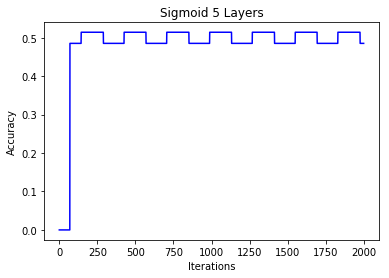

In [42]:
mt.figure('Sigmoid 5 Layers')
mt.plot(range(len(plot_accuracy)), plot_accuracy, 'b', label='lambda=0.0001')

mt.xlabel('Iterations')
mt.ylabel('Accuracy')
mt.title('Sigmoid 5 Layers')
mt.axis('tight')
mt.show()

In [43]:
layers_test=[]
for i in range(len(neurons)):
    lay=Layer()
    
    if(i!=len(neurons)-1):
        theta=layers[i].getTheta()
        lay.setTheta(theta)
    layers_test.append(lay)
    
layers_test[0].setA(X_test)
# Forward propagation
for i in range(1,l):
    z=np.dot(layers_test[i-1].getTheta().T, layers_test[i-1].getA())
    if(i==l-1):
        a=softmax(z)
    else:
        a=sigmoid(z)
        
    layers_test[i].setZ(z)
    layers_test[i].setA(a)

accuracy_test(layers_test[-1].getA().T)

0.4991231146965977


In [44]:
for i in range(len(neurons)-1):
    print(layers[i].getTheta())

[[0.33539163 0.52803957 0.98643535 ... 0.13290268 0.87947758 0.38012135]
 [0.25695217 0.40123649 0.79551842 ... 0.85774798 0.38176016 0.98651316]
 [0.34414988 0.93240476 0.18397561 ... 0.34634433 0.93578852 0.70706655]
 ...
 [0.18295118 0.43300663 0.53430661 ... 0.65386863 0.99402589 0.26296021]
 [0.23968902 0.93931897 0.44568306 ... 0.79343727 0.2317162  0.33658856]
 [0.52855416 0.65590831 0.34565418 ... 0.12310661 0.26712816 0.23968174]]
[[0.84862199 0.26872932 0.79792143 ... 0.3035002  0.16935739 0.20808318]
 [0.35286945 0.14278757 0.24700475 ... 0.17999045 0.95733551 0.85993077]
 [0.26115779 0.4747356  0.13205302 ... 0.84028393 0.53445766 0.21977534]
 ...
 [0.55107804 0.38557    0.3658302  ... 0.30761613 0.67522908 0.27429579]
 [0.49066574 0.12687777 0.58481551 ... 0.29591674 0.31556849 0.16666489]
 [0.48833411 0.38067613 0.55465465 ... 0.55518213 0.68672982 0.62604874]]
[[0.9558854  0.33411977 0.50768653 ... 0.49359009 0.81492575 0.59286061]
 [0.79000321 0.56395666 0.88529321 ... 